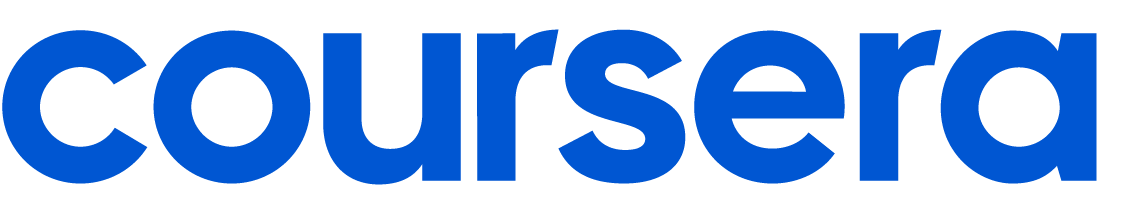

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import time

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
numeric_mask = train_df.apply(lambda col: pd.to_numeric(col, errors='coerce').notna().all())

# Identify numeric and non-numeric columns
numeric_cols = list(train_df.columns[numeric_mask])
categoric_cols = list(train_df.columns[~numeric_mask])

In [7]:
print(train_df.info())
print('--------------------')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

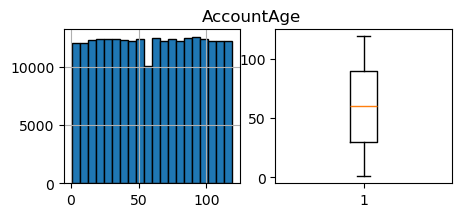

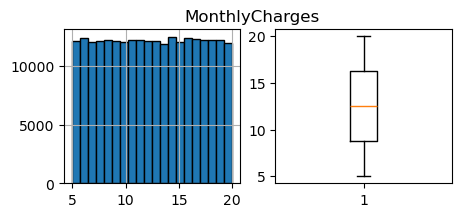

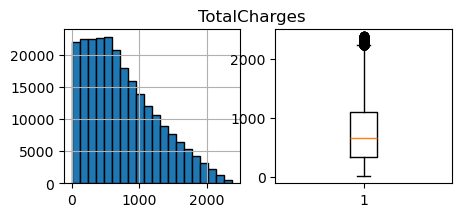

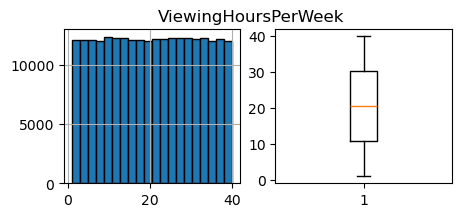

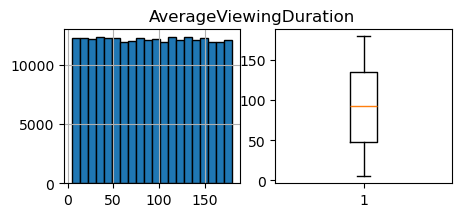

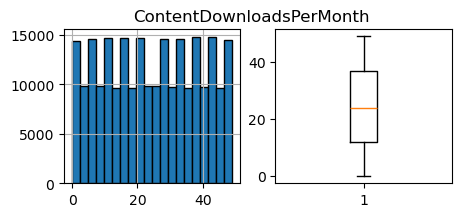

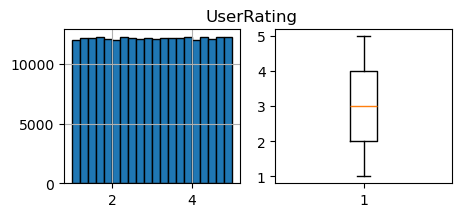

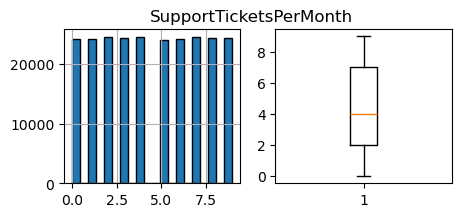

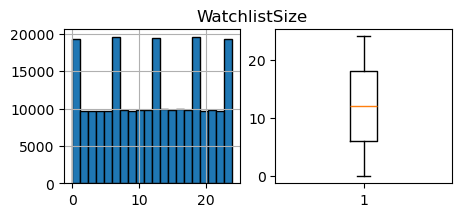

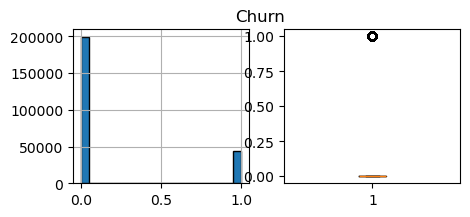

In [8]:
for col in numeric_cols:
    fig, axs = plt.subplots(1, 2, figsize=(5, 2))
    fig.suptitle(col)
    train_df[col].hist(ax=axs[0], bins=20, edgecolor='k')
    axs[1].boxplot(train_df[col])

plt.show()

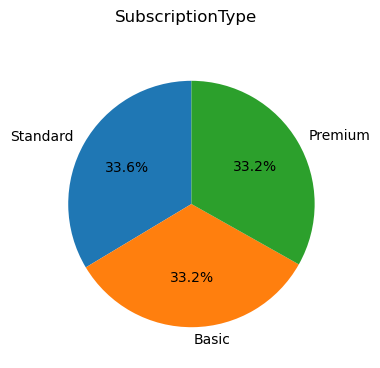

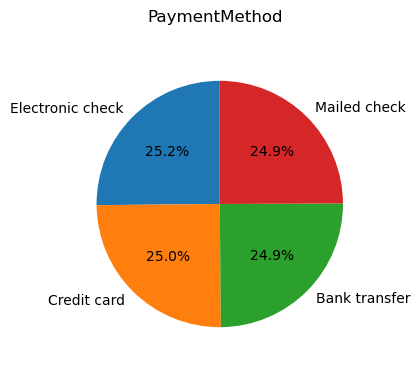

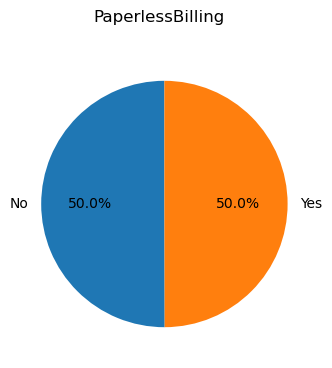

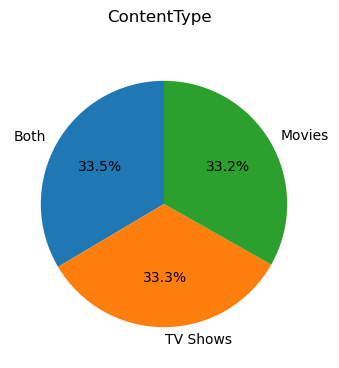

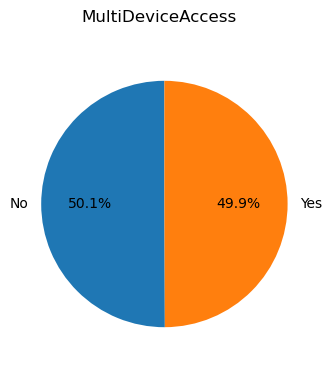

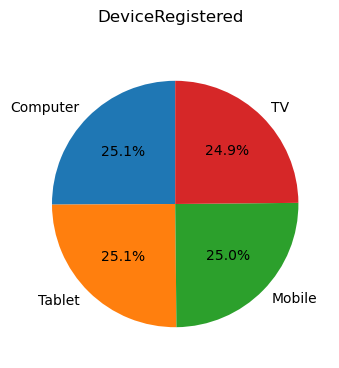

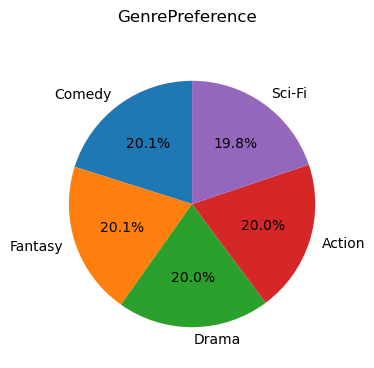

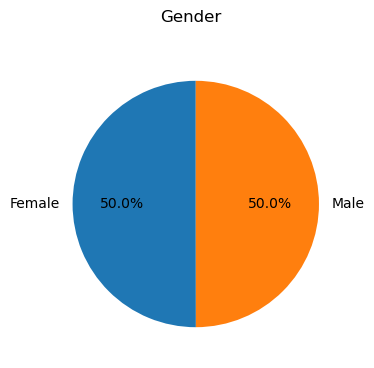

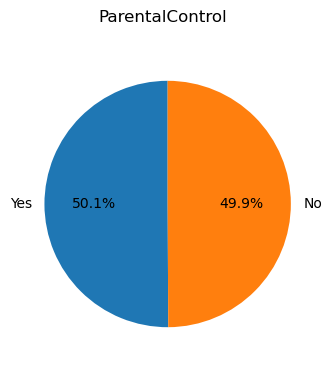

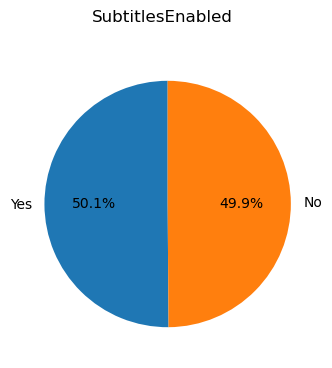

In [9]:
for col in categoric_cols:
    if col == "CustomerID":
        continue
        
    category_counts = train_df[col].value_counts()

    # Plot pie chart
    fig, axs = plt.subplots(figsize=(4,4))
    fig.suptitle(col)
    axs.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=90)

plt.show()

**Summary**

Exploratory analysis shows that the data distribution for both numerical and categorical data are even.
Outliers can be seen for TotalCharges, in which higher charges are less common than lower ones.

The ratio between churn and no-churn are roughly 20:80, indicating that most users are retained.

## Feature Engineering

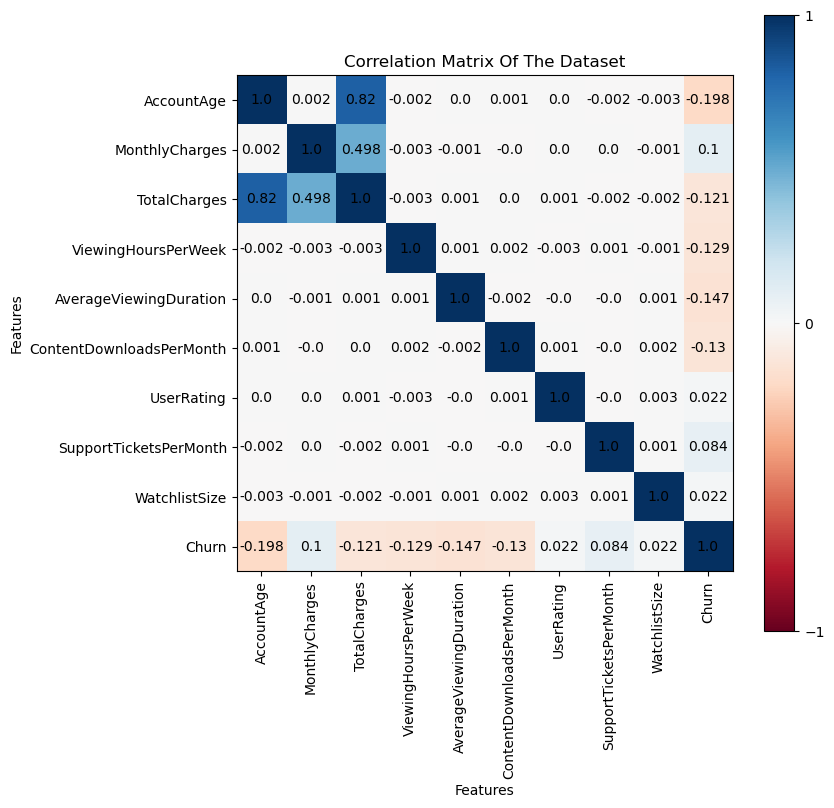

In [10]:
# Compute correlation between numerical values

corr_mat = train_df[numeric_cols].corr()

df_temp = corr_mat.iloc[-1]
useful_nums = list(df_temp[df_temp.abs() > 0.1].index)
useful_nums.remove("Churn")

# Visualisation
fig, axs = plt.subplots(figsize=(8,8))

# Plot the heatmap with custom colors and annotations 
plt.imshow(corr_mat, cmap="RdBu", vmin=-1, vmax=1)

for i in range(len(numeric_cols)): 
    for j in range(len(numeric_cols)):
        text = axs.text(j, i, round(corr_mat.iloc[i, j], 3),
                       ha="center", va="center", color="k")

# Add colorbar
cbar = plt.colorbar(ticks=[-1, 0, 1]) 

# Set tick labels 
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90) 
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns) 

# Set plot title and axis labels 
plt.title("Correlation Matrix Of The Dataset") 
plt.xlabel("Features") 
plt.ylabel("Features") 

plt.show()

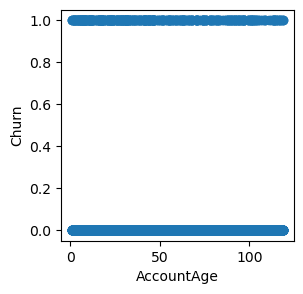

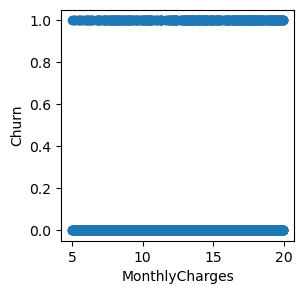

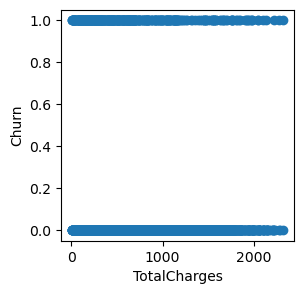

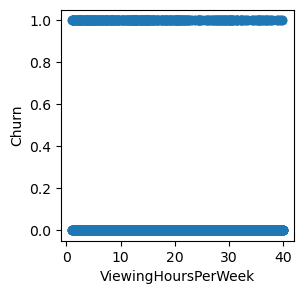

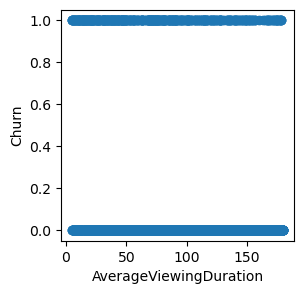

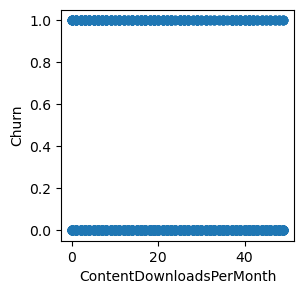

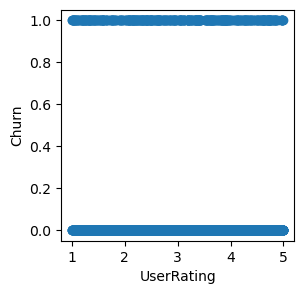

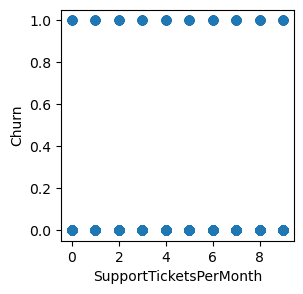

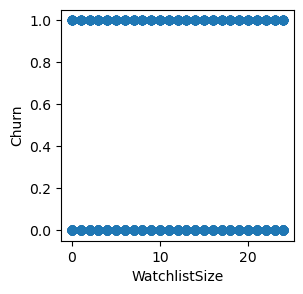

In [11]:
# Plot relation between numerical features and Churn

for col in numeric_cols:
    if col == "Churn":
        continue

    fig, axs = plt.subplots(figsize=(3,3))

    # Sample a few because there are too many points
    axs.scatter(train_df.iloc[::100, :][col], train_df.iloc[::100, :]["Churn"])
    axs.set_xlabel(col)
    axs.set_ylabel("Churn")
    
plt.show()

**Summary**

TotalCharges are correlated to AccountAge and MonthlyCharges as it is a product of the latter two.

Churn shows minor negative correlation to AccountAge, TotalCharges, ViewingHoursPerWeek, AverageViewingDuration, ContentDownloadsPerMonth. This implies that users who stay for longer period and with higher usage are more likely to retain subscription.
On the other hand, high monthly charges could be detrimental to discontinued subscriptions.

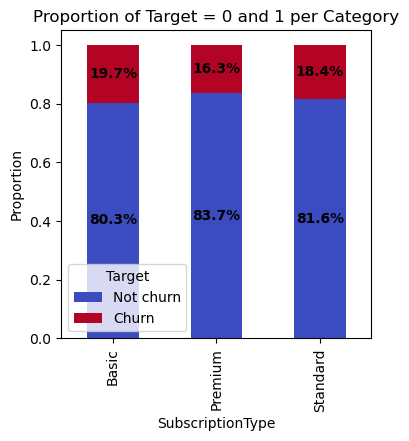

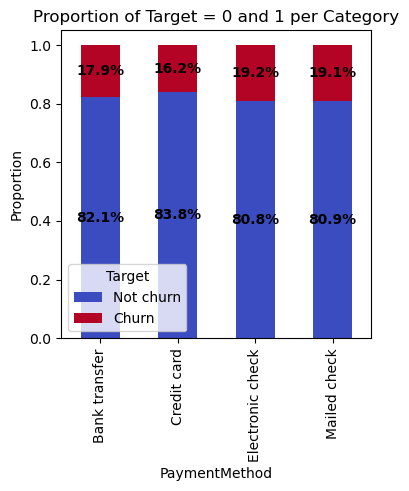

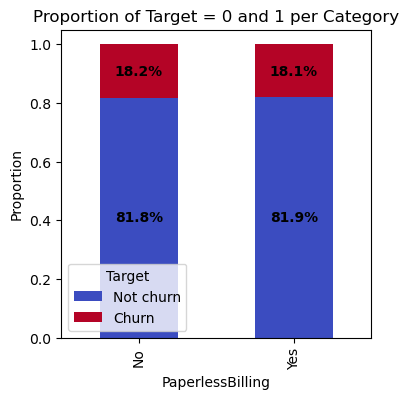

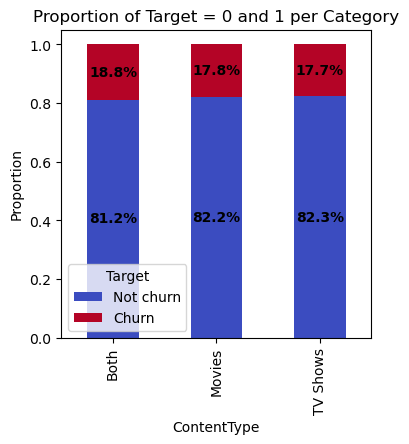

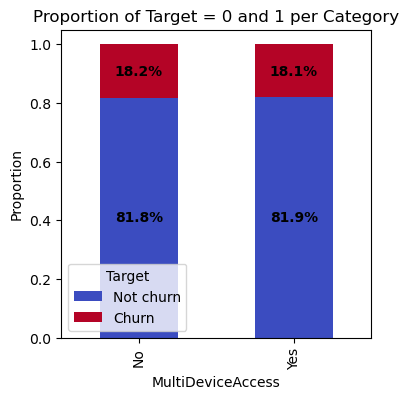

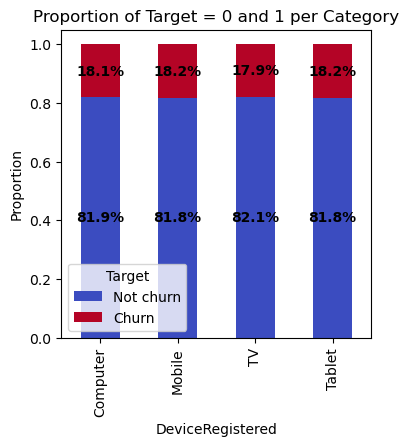

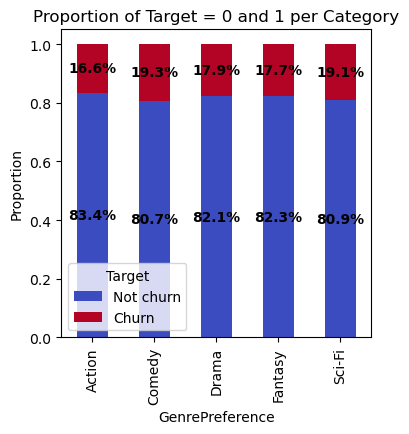

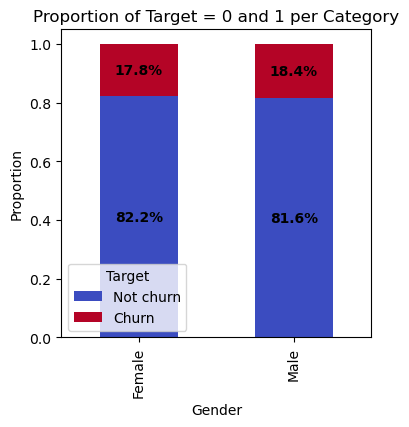

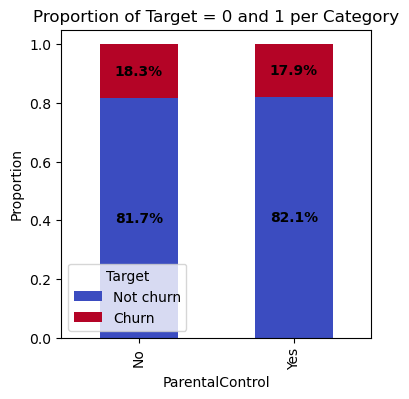

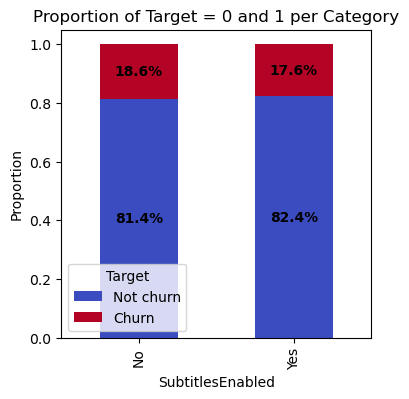

In [12]:
# Find the categorical composition between customers of different churns

for cat in categoric_cols:
    if cat == "CustomerID":
        continue
        
    df_cat = train_df[[cat, "Churn"]]
    
    # Compute the proportion of target=0 and target=1 for each category
    count_data = df_cat.groupby([cat, "Churn"]).size().unstack()

    # Normalize to get proportions
    proportions = count_data.div(count_data.sum(axis=1), axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(4,4))
    proportions.plot(ax=axs, kind="bar", stacked=True, colormap="coolwarm")
    axs.set_title("Proportion of Target = 0 and 1 per Category")
    axs.set_ylabel("Proportion")
    axs.set_xlabel(cat)
    axs.legend(title="Target", labels=["Not churn", "Churn"])
    
    for i, category in enumerate(proportions.index):
        bottom = 0  # Track bottom position for stacking
        for target_value in proportions.columns:
            percentage = proportions.loc[category, target_value]  # Convert to percentage
            if percentage > 0:  # Only label non-zero values
                axs.text(i, bottom + percentage / 2, f"{percentage*100:.1f}%", 
                        ha='center', va='center', color='black', fontsize=10, fontweight='bold')
            bottom += percentage  # Update the bottom for the next stacked segment

plt.show()
# Useful features: ["SubscriptionType", "PaymentMethod", "ContentType", "GenrePreference", "Gender", "ParentalControl", "SubstitlesEnabled"]

In [13]:
# Identify categories that show significant statistical differences between different churns.
useful_cats = []

for cat in categoric_cols:
    if cat == "CustomerID":
        continue
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[cat], train_df["Churn"])

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.01:
        print(f"**{cat}  \t\tp-value: {p}")
        useful_cats.append(cat)
    elif p < 0.05:
        print(f"*{cat}  \t\tp-value: {p}")
        useful_cats.append(cat)
    else:
        print(f"{cat}  \t\tp-value: {p}")

**SubscriptionType  		p-value: 7.072956347996253e-70
**PaymentMethod  		p-value: 1.0184848697107935e-51
PaperlessBilling  		p-value: 0.6524892605592605
**ContentType  		p-value: 3.6650874132984465e-10
MultiDeviceAccess  		p-value: 0.5290817523033773
DeviceRegistered  		p-value: 0.41709804511183657
**GenrePreference  		p-value: 1.4805317432305844e-35
**Gender  		p-value: 0.0002317673805092968
**ParentalControl  		p-value: 0.00641722708549484
**SubtitlesEnabled  		p-value: 1.0382801241415897e-09


In [14]:
print("Numerical features that is may be helpful in churn prediction:", useful_nums)
print("Categorical features that is may be helpful in churn prediction:", useful_cats)

Numerical features that is may be helpful in churn prediction: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth']
Categorical features that is may be helpful in churn prediction: ['SubscriptionType', 'PaymentMethod', 'ContentType', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']


## Prepare Dataset

In [ ]:
'''
Experiment showed that the performance is higher when using all features compared to the ones shortlisted from the analysis above.
However, we still keep the option to select the shortlisted features. 
'''
# # Use only selected features
# num_temp = useful_nums
# cat_temp = useful_cats

# Use all features
num_temp = numeric_cols
if "Churn" in num_temp:
    num_temp.remove("Churn")
cat_temp = categoric_cols
if "CustomerID" in cat_temp:
    cat_temp.remove("CustomerID")

X_train_temp = train_df[num_temp+cat_temp]
y_train_temp = train_df["Churn"]

X_test_submission = test_df[num_temp+cat_temp]

for cat in cat_temp:
    if cat == "CustomerID":
        continue
    assert(set(X_train_temp[cat].unique()) == set(X_test_submission[cat].unique()))

In [48]:
# Scale numerical data
scaler = StandardScaler()
X_train_temp[num_temp] = scaler.fit_transform(X_train_temp[num_temp])

# One-hot encode categorical data
# encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
# encoded_cat_features = encoder.fit_transform(X_train_temp[cat_temp])
# encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names(cat_temp))
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cat_features = encoder.fit_transform(X_train_temp[cat_temp])
encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names_out(cat_temp))

X_train_temp = pd.concat([X_train_temp[num_temp], encoded_cat_df], axis=1)
X_train_temp

C:\Users\mjeat\AppData\Local\Temp\ipykernel_18108\4163676185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_temp[num_temp] = scaler.fit_transform(X_train_temp[num_temp])


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0.493400,-0.658746,-0.016190,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
243783,1.660088,0.129070,1.483585,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
243784,1.543419,0.467666,1.700349,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
243785,-1.548305,1.305539,-1.192488,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [49]:
# Create another test set from the train set for internal fine-tuning as we do not have the ground truth for it

X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0, stratify=y_train_temp)

# Print shape of features and target
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (195029, 38)
Shape of y_train: (195029,)
Shape of X_test: (48758, 38)
Shape of y_test: (48758,)


In [50]:
# Process test dataset similarly

X_test_submission[num_temp] = scaler.transform(X_test_submission[num_temp])

encoded_cat_features = encoder.transform(X_test_submission[cat_temp])
# encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names(cat_temp))
encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names_out(cat_temp))

X_test_submission_processed = pd.concat([X_test_submission[num_temp], encoded_cat_df], axis=1)
X_test_submission_processed

C:\Users\mjeat\AppData\Local\Temp\ipykernel_18108\10016890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_submission[num_temp] = scaler.transform(X_test_submission[num_temp])


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,-0.644122,1.242876,-0.137084,0.767017,0.594196,1.213252,0.450126,-0.871766,1.526687,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.493400,-0.595673,0.023990,1.456060,-0.696379,1.282595,-0.849307,-0.871766,1.387664,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-1.606640,0.584230,-1.291688,-1.147346,0.953367,-0.728341,1.561050,-0.871766,1.387664,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.814239,0.662424,1.148428,1.341570,1.677817,-0.728341,1.680308,-1.568014,1.526687,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.901741,-0.019563,0.723051,0.266946,-0.434722,-1.283082,-0.134890,0.520728,-1.670857,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,0.580901,1.122454,1.218030,-0.116780,0.854985,0.727854,-1.377081,0.868852,0.275474,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
104476,-1.169131,-0.974034,-1.118836,0.932469,0.447570,-0.520313,-0.189450,-0.871766,-0.558668,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
104477,1.339249,1.304104,2.239651,-1.179847,0.342917,0.450483,-0.009682,-1.219890,-0.002573,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
104478,-0.410784,1.682989,0.303712,0.472006,0.453211,-1.629795,1.727154,-1.568014,-0.002573,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Exploring Different Models

We will experiment with different models through cross validation and grid search.

In [ ]:
# This should store the best models and the performance stats to decide on the best model later
models = {}
model_stats = {}

In [52]:
# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Logistic Regression as Baseline Model

In [53]:
logreg = LogisticRegression(random_state=0)

lr_baseline_scores_train = cross_validate(logreg, X_train, y_train,
                                 scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=None)

lr_baseline_scores_train = pd.DataFrame(lr_baseline_scores_train)
lr_baseline_scores_train = lr_baseline_scores_train.drop(columns=["fit_time", "score_time"])
lr_baseline_scores_train.columns = [x.replace("test_", "") for x in lr_baseline_scores_train.columns]

df_stats = lr_baseline_scores_train.mean(axis=0)
df_stats["model"] = "baseline_lr"

# display("Baseline logistic regression mean scores", df_stats)

logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc
# print(f"Train Logistic Regression Accuracy: {train_accuracy:.4f}")
# print(f"Train ROC: {train_roc_auc:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc
# print(f"Test Logistic Regression Accuracy: {test_accuracy:.4f}")
# print(f"Test ROC: {test_roc_auc:.4f}")

model_stats[df_stats["model"]] = df_stats
df_stats

accuracy        0.824042
precision       0.571115
recall          0.116933
f1              0.194113
roc_auc         0.749603
model        baseline_lr
acc_train       0.823949
roc_train       0.548622
acc_test        0.825608
roc_test        0.553041
dtype: object

### Logistic Regression (Weighted)

In [54]:
t0 = time.time()

logreg = LogisticRegression(class_weight='balanced', random_state=0)

lr_weighted_scores_train = cross_validate(logreg, X_train, y_train,
                                 scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=skf)

lr_weighted_scores_train = pd.DataFrame(lr_weighted_scores_train)
lr_weighted_scores_train = lr_weighted_scores_train.drop(columns=["fit_time", "score_time"])
lr_weighted_scores_train.columns = [x.replace("test_", "") for x in lr_weighted_scores_train.columns]

df_stats = lr_weighted_scores_train.mean(axis=0)
df_stats["model"] = "weighted_lr"

# display("Weighted logistic regression mean scores", df_stats)

logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc
# print(f"Train Logistic Regression Accuracy: {train_accuracy:.4f}")
# print(f"Train ROC: {train_roc_auc:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc
# print(f"Test Logistic Regression Accuracy: {test_accuracy:.4f}")
# print(f"Test ROC: {test_roc_auc:.4f}")

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
df_stats

runtime  1.6523072719573975


accuracy        0.678315
precision       0.320429
recall          0.691413
f1              0.437907
roc_auc         0.749466
model        weighted_lr
acc_train       0.678315
roc_train       0.683359
acc_test        0.678309
roc_test        0.686626
dtype: object

### Logistic Regression (Elasticnet)

In [55]:
t0 = time.time()

logreg = LogisticRegression(penalty="elasticnet", class_weight='balanced',
                            solver='saga', l1_ratio=0.5,
                            max_iter=1000, random_state=0)

lr_weighted_elastic_scores_train = cross_validate(logreg, X_train, y_train,
                                 scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=skf)

lr_weighted_elastic_scores_train = pd.DataFrame(lr_weighted_elastic_scores_train)
lr_weighted_elastic_scores_train = lr_weighted_elastic_scores_train.drop(columns=["fit_time", "score_time"])
lr_weighted_elastic_scores_train.columns = [x.replace("test_", "") for x in lr_weighted_elastic_scores_train.columns]

df_stats = lr_weighted_elastic_scores_train.mean(axis=0)
df_stats["model"] = "weighted_elastic_lr"

# display("Weighted elastic logistic regression mean scores", df_stats)

logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
df_stats

runtime  70.23481440544128


accuracy                0.678279
precision               0.320396
recall                  0.691385
f1                       0.43787
roc_auc                 0.749466
model        weighted_elastic_lr
acc_train                0.67832
roc_train               0.683362
acc_test                 0.67833
roc_test                0.686683
dtype: object

### Random Forest

In [56]:
t0 = time.time()

rf = RandomForestClassifier(random_state=0, class_weight="balanced")

params = {"n_estimators": [200, 300, 400], "max_depth": [5, 10], "min_samples_split": [5, 10], "min_samples_leaf": [3, 5, 7],
          "bootstrap": [False, True], "random_state":[0]}
# params = {"n_estimators": [400, 500, 600], "max_depth": [8, 12], "min_samples_split": [10, 16, 20], "min_samples_leaf": [5, 8, 10],
#           "bootstrap": [False, True], "random_state":[0]}
# params = {"n_estimators": [400], "max_depth": [10], "min_samples_split": [5], "min_samples_leaf": [5], "bootstrap": [False, True], "random_state":[0]}

grid_search = GridSearchCV(
        estimator=rf,
        param_grid=params,
        cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        verbose=2,
        refit='roc_auc',
        n_jobs=-1
    )

grid_search.fit(X_train[::10], y_train[::10])

best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

random_forest_scores_train = model_stats["weighted_lr"].copy()
random_forest_scores_train["accuracy"] = grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]
random_forest_scores_train["precision"] = grid_search.cv_results_["mean_test_precision"][grid_search.best_index_]
random_forest_scores_train["recall"] = grid_search.cv_results_["mean_test_recall"][grid_search.best_index_]
random_forest_scores_train["f1"] = grid_search.cv_results_["mean_test_f1"][grid_search.best_index_]
random_forest_scores_train["roc_auc"] = grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_]

print(f"Best param for Random Forest: {best_model_params}")

df_stats = random_forest_scores_train
df_stats["model"] = "random_forest"
# display("Random Forest mean scores", df_stats)

best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
models[df_stats["model"]] = best_model
df_stats

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best param for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 400, 'random_state': 0}
runtime  219.69829297065735


accuracy          0.760601
precision          0.37472
recall            0.477661
f1                 0.41987
roc_auc           0.736536
model        random_forest
acc_train         0.716509
roc_train         0.715991
acc_test          0.694676
roc_test          0.677501
dtype: object

### XGBoost

In [57]:
t0 = time.time()

xgb = XGBClassifier(random_state=0)

# params = {"n_estimators": [100, 200, 300], "learning_rate": [0.001, 0.01, 0.1, 1], "early_stopping_rounds":[5, 10, 50] }
params = {'n_estimators': np.arange(100, 301, 100).tolist(),  # Reduced number of boosting rounds
            'max_depth': np.arange(1, 8, 2).tolist(),  # Keep trees shallow to avoid overfitting
            'learning_rate': np.logspace(-3, 0, 5).tolist(),  # Smaller learning rate for gradual learning
            # 'subsample': np.arange(0.6, 1.01, 0.05).tolist(),  # Ensure enough samples per tree
            # 'colsample_bytree': np.arange(0.6, 1.01, 0.05).tolist(),  # Subsample columns for diversity
            # 'gamma': np.logspace(0, 1, 12).tolist(),
            # 'reg_lambda': np.logspace(-2, 2, 12).tolist(),  # Change to evenly spaced logarithmic values
            # 'reg_alpha': np.logspace(-4, 1, 12).tolist(),  # Change to evenly spaced logarithmic values
            'min_child_weight': np.arange(1, 12, 3).tolist(),  # Minimum sum of instance weight (hessian) needed in a child
            'scale_pos_weight': [0.25, 1],  # Set based on class imbalance
            "early_stopping_rounds":[5, 10, 50] 
}
# params = {"n_estimators": [100, 200], "early_stopping_rounds":[5, 10]  }

grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=params,
        cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        verbose=2,
        refit='roc_auc',
        n_jobs=-1
    )

# Because of runtime, train on a smaller dataset
grid_search.fit(X_train[::100], y_train[::100], eval_set=[(X_train[::100], y_train[::100]), (X_test[::100], y_test[::100])], )

best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

xgb_scores_train = model_stats["weighted_lr"].copy()
xgb_scores_train["accuracy"] = grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]
xgb_scores_train["precision"] = grid_search.cv_results_["mean_test_precision"][grid_search.best_index_]
xgb_scores_train["recall"] = grid_search.cv_results_["mean_test_recall"][grid_search.best_index_]
xgb_scores_train["f1"] = grid_search.cv_results_["mean_test_f1"][grid_search.best_index_]
xgb_scores_train["roc_auc"] = grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_]

print(f"Best param for SVM: {best_model_params}")

df_stats = xgb_scores_train
df_stats["model"] = "xgb"
# display("XGBooster mean scores", df_stats)

best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
models[df_stats["model"]] = best_model
df_stats

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[0]	validation_0-logloss:0.50507	validation_1-logloss:0.46622
[1]	validation_0-logloss:0.50102	validation_1-logloss:0.46422
[2]	validation_0-logloss:0.49724	validation_1-logloss:0.46256
[3]	validation_0-logloss:0.49365	validation_1-logloss:0.46100
[4]	validation_0-logloss:0.49019	validation_1-logloss:0.45939
[5]	validation_0-logloss:0.48684	validation_1-logloss:0.45818
[6]	validation_0-logloss:0.48367	validation_1-logloss:0.45669
[7]	validation_0-logloss:0.48075	validation_1-logloss:0.45489
[8]	validation_0-logloss:0.47782	validation_1-logloss:0.45335
[9]	validation_0-logloss:0.47498	validation_1-logloss:0.45163
[10]	validation_0-logloss:0.47224	validation_1-logloss:0.44999
[11]	validation_0-logloss:0.46949	validation_1-logloss:0.44857
[12]	validation_0-logloss:0.46700	validation_1-logloss:0.44704
[13]	validation_0-logloss:0.46451	validation_1-logloss:0.44599
[14]	validation_0-logloss:0.46212	validation_1-logloss:0.44489


accuracy     0.794464
precision    0.486247
recall       0.057722
f1           0.101409
roc_auc      0.708555
model             xgb
acc_train     0.82277
roc_train    0.520827
acc_test     0.822286
roc_test     0.520569
dtype: object

### SVM

In [58]:
t0 = time.time()

svm = SVC(kernel='rbf', random_state=0, probability=True)

# params = {"C": [0.1, 0.3, 1, 3], "kernel": ['poly', 'rbf'], }
params = {"C": [0.1, 0.3, 1, 3], "gamma": ['scale', 'auto'] }
# params = {"C": [0.1], "gamma": ['auto'] }
# params = {"C": [1], "kernel": ['poly', 'rbf'], }

grid_search = GridSearchCV(
        estimator=svm,
        param_grid=params,
        cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        verbose=2,
        refit='roc_auc',
        n_jobs=-1
    )

# Because of runtime, train on a smaller dataset
grid_search.fit(X_train[::50], y_train[::50])

best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

svm_scores_train = model_stats["weighted_lr"].copy()
svm_scores_train["accuracy"] = grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]
svm_scores_train["precision"] = grid_search.cv_results_["mean_test_precision"][grid_search.best_index_]
svm_scores_train["recall"] = grid_search.cv_results_["mean_test_recall"][grid_search.best_index_]
svm_scores_train["f1"] = grid_search.cv_results_["mean_test_f1"][grid_search.best_index_]
svm_scores_train["roc_auc"] = grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_]

print(f"Best param for SVM: {best_model_params}")

df_stats = svm_scores_train
df_stats["model"] = "svm"
# display("SVM mean scores", df_stats)

best_model.fit(X_train[::10], y_train[::10])

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
models[df_stats["model"]] = best_model
df_stats

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best param for SVM: {'C': 3, 'gamma': 'auto'}
runtime  172.79275703430176


accuracy     0.809279
precision    0.659091
recall       0.025351
f1            0.04825
roc_auc      0.657423
model             svm
acc_train    0.820586
roc_train    0.507795
acc_test     0.820194
roc_test     0.507177
dtype: object

### KNN

In [59]:
t0 = time.time()

knn_classifier = KNeighborsClassifier(n_neighbors=2)

params = {"n_neighbors": list(range(2, 8)), "weights": ['uniform', 'distance']}

grid_search = GridSearchCV(
        estimator=knn_classifier,
        param_grid=params,
        cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        verbose=2,
        refit='roc_auc',
        n_jobs=-1
    )

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

knn_scores_train = model_stats["weighted_lr"].copy()
knn_scores_train["accuracy"] = grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]
knn_scores_train["precision"] = grid_search.cv_results_["mean_test_precision"][grid_search.best_index_]
knn_scores_train["recall"] = grid_search.cv_results_["mean_test_recall"][grid_search.best_index_]
knn_scores_train["f1"] = grid_search.cv_results_["mean_test_f1"][grid_search.best_index_]
knn_scores_train["roc_auc"] = grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_]

print(f"Best param for KNN: {best_model_params}")

df_stats = knn_scores_train
df_stats["model"] = "knn"
# display("KNN mean scores", df_stats)

best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
models[df_stats["model"]] = best_model
df_stats

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best param for KNN: {'n_neighbors': 7, 'weights': 'distance'}
runtime  328.3021409511566


accuracy     0.807706
precision     0.40083
recall       0.123327
f1           0.188602
roc_auc      0.644141
model             knn
acc_train         1.0
roc_train         1.0
acc_test     0.805427
roc_test     0.538822
dtype: object

### MLP

In [60]:
t0 = time.time()

# Define the model
mlp = MLPClassifier(random_state=0)

params = {
    'hidden_layer_sizes': [
        (50,), (100,),  # Single hidden layers
        (50, 50), (100, 100),  # Two hidden layers
        (50, 5, 500), (50, 100, 100),  # Three hidden layers
    ],
    'activation': ['logistic'],
    'alpha': [0.0001, 0.001, 0.01], 
    'learning_rate': ['constant', 'adaptive'], 
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300],  # Number of iterations for training
    'early_stopping': [True],  # Early stopping option
}

# Set up GridSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=params,
                                   scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                   cv=skf, n_jobs=-1, verbose=2, refit='roc_auc',
                                   n_iter=20, random_state=0)

# Fit the model using the sampled training data
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_model_params = random_search.best_params_

mlp_scores_train = model_stats["weighted_lr"].copy()
mlp_scores_train["accuracy"] = random_search.cv_results_["mean_test_accuracy"][random_search.best_index_]
mlp_scores_train["precision"] = random_search.cv_results_["mean_test_precision"][random_search.best_index_]
mlp_scores_train["recall"] = random_search.cv_results_["mean_test_recall"][random_search.best_index_]
mlp_scores_train["f1"] = random_search.cv_results_["mean_test_f1"][random_search.best_index_]
mlp_scores_train["roc_auc"] = random_search.cv_results_["mean_test_roc_auc"][random_search.best_index_]

print(f"Best param for MLP: {best_model_params}")

df_stats = mlp_scores_train
df_stats["model"] = "mlp"
# display("MLP mean scores", df_stats)

best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
df_stats["acc_train"] = train_accuracy
df_stats["roc_train"] = train_roc_auc

test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
df_stats["acc_test"] = test_accuracy
df_stats["roc_test"] = test_roc_auc

t1 = time.time()
print("runtime ", t1-t0)

model_stats[df_stats["model"]] = df_stats
models[df_stats["model"]] = best_model
df_stats

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best param for MLP: {'max_iter': 300, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 100), 'early_stopping': True, 'alpha': 0.0001, 'activation': 'logistic'}
runtime  289.35447931289673


accuracy     0.823252
precision    0.581348
recall       0.090932
f1           0.156305
roc_auc      0.749198
model             mlp
acc_train    0.823872
roc_train    0.543475
acc_test     0.825054
roc_test     0.546711
dtype: object

### Consolidate Models Results

In [61]:
### Results from full features

df_model_stats = []
for model, df in model_stats.items():
    # df["model2"] = model  # Add dictionary key as a new column
    df_model_stats.append(df)

df_model_stats = pd.concat(df_model_stats, axis=1, ignore_index=True).T
df_model_stats

,accuracy,precision,recall,f1,roc_auc,model,acc_train,roc_train,acc_test,roc_test
0,0.824042,0.571115,0.116933,0.194113,0.749603,baseline_lr,0.823949,0.548622,0.825608,0.553041
1,0.678315,0.320429,0.691413,0.437907,0.749466,weighted_lr,0.678315,0.683359,0.678309,0.686626
2,0.678279,0.320396,0.691385,0.43787,0.749466,weighted_elastic_lr,0.67832,0.683362,0.67833,0.686683
3,0.760601,0.37472,0.477661,0.41987,0.736536,random_forest,0.716509,0.715991,0.694676,0.677501
4,0.794464,0.486247,0.057722,0.101409,0.708555,xgb,0.82277,0.520827,0.822286,0.520569
5,0.809279,0.659091,0.025351,0.04825,0.657423,svm,0.820586,0.507795,0.820194,0.507177
6,0.807706,0.40083,0.123327,0.188602,0.644141,knn,1.0,1.0,0.805427,0.538822
7,0.823252,0.581348,0.090932,0.156305,0.749198,mlp,0.823872,0.543475,0.825054,0.546711


The results show that elastic net logistic regression has the highest ROC test score despite being a simple model compared to machine learning methodologies. We will adopt this option.

In [ ]:
### Results from shortlisted features

# df_model_stats = []
# for model, df in model_stats.items():
#     # df["model2"] = model  # Add dictionary key as a new column
#     df_model_stats.append(df)

# df_model_stats = pd.concat(df_model_stats, axis=1, ignore_index=True).T
# df_model_stats

,accuracy,precision,recall,f1,roc_auc,model,acc_train,roc_train,acc_test,roc_test
0,0.822621,0.56122,0.097779,0.166534,0.740906,baseline_lr,0.822714,0.540586,0.823414,0.544079
1,0.671228,0.313646,0.685047,0.430284,0.740773,weighted_lr,0.670972,0.676441,0.673284,0.68206
2,0.671223,0.313636,0.685019,0.43027,0.740772,weighted_elastic_lr,0.670998,0.676379,0.673325,0.682085
3,0.746398,0.356602,0.495191,0.414581,0.72808,random_forest,0.7047,0.706401,0.684852,0.672074
4,0.791386,0.462139,0.06019,0.105433,0.70963,xgb,0.822201,0.519532,0.821916,0.519595
5,0.807998,0.0,0.0,0.0,0.638918,svm,0.818771,0.5,0.818758,0.5
6,0.804137,0.382938,0.1319,0.196207,0.646628,knn,1.0,1.0,0.806145,0.547279
7,0.822544,0.56675,0.092856,0.158563,0.740734,mlp,0.822596,0.54503,0.823126,0.548221


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

### Prepare Output Dataset

In [ ]:
# Use the model with highest ROC test score.
logreg = LogisticRegression(penalty="elasticnet", class_weight='balanced',
                            solver='saga', l1_ratio=0.5,
                            max_iter=1000, random_state=0)

logreg.fit(X_train, y_train)

predicted_probability = logreg.predict_proba(X_test_submission_processed)[:, 1]

In [66]:
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.347959
1,LFR4X92X8H,0.160748
2,QM5GBIYODA,0.755096
3,D9RXTK2K9F,0.173264
4,ENTCCHR1LR,0.413866
5,7A88BB5IO6,0.798818
6,70OMW9XEWR,0.376780
7,EL1RMFMPYL,0.655465
8,4IA2QPT6ZK,0.537513
9,AEDCWHSJDN,0.497231


## Dummy Code as Benchmark

In [147]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [148]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]

In [7]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [8]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.0
1,LFR4X92X8H,0.0
2,QM5GBIYODA,0.0
3,D9RXTK2K9F,0.0
4,ENTCCHR1LR,0.0
5,7A88BB5IO6,1.0
6,70OMW9XEWR,0.0
7,EL1RMFMPYL,0.0
8,4IA2QPT6ZK,0.0
9,AEDCWHSJDN,1.0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [187]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [188]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [189]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [190]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [191]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

# Achievement
The model achieved ROC AUC score of 0.7508.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!